### Over View
- I have churn data from a kaggle repository. I need to figure out the features that make customers churn. I will use a decision tree to do this.

### Content

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

from IPython.display import Image  
from sklearn import tree
import pydotplus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
churn = pd.read_csv('churn.csv')

### What does my dataframe look like

In [3]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Visualization of target feature

Churn:
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


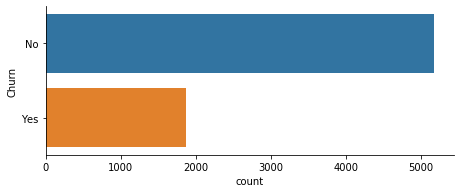

In [5]:
print("Churn:")
print(churn['Churn'].value_counts(normalize=True) * 100)

ax = sns.catplot(y="Churn", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

### Get basic descriptive statistics for the data and check for missing and incorrect or extreme values. 

- This dataset has categorical and numeric values, when using churn.describe I will only be able to get statistics from the numeric value in the dataframe. Once I am done finding missing values, I will label and one hot encode the categorical data so that I am able to use those columns in my modeling process

In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
churn.isnull().sum().sum()

0

### I have noticed that MonthlyCharges is a float but TotalCharges is an object so I will change the column to numeric values to see if there is anything not right with that column

In [9]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors='coerce')

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### Now I will see if there are any missing or NaN values in my dataframe

In [11]:
churn.isnull().sum().sum()

11

### I have found that there are 11 missing values in the TotalCharges column, I will drop these rows so that I am able to use TotalCharges later in my analysis.

In [12]:
churn.dropna(inplace = True)

In [13]:
churn.isnull().sum().sum()

0

### I will not be using the customerID column so I will drop it

In [14]:
churn = churn.drop(['customerID'], axis =1)

# Categorical values overview

### I will do some basic EDA to to see if I can create some assumptions on certain columns of the dataframe
### I plan to use any categorical columns that have three or more values in the column, like InternetService has Fiber optic, DSL and No.

## Internet Services count

InternetService:
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64


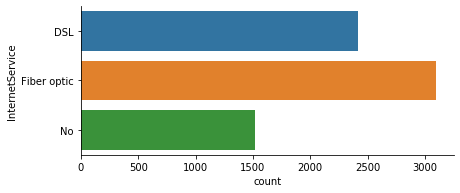

In [15]:
print("InternetService:")
print(churn['InternetService'].value_counts(normalize=True) * 100)

ax = sns.catplot(y="InternetService", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

## Internet Services count vs churn

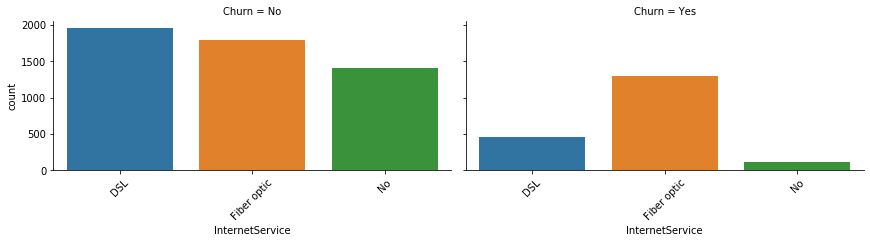

In [16]:
g = sns.catplot(x="InternetService", col="Churn",
                data=churn, kind="count", height=3, aspect=2)
g.set_xticklabels(rotation=45)

### Insights
- From the graphs above it looks like majority of the clients use fiber optics, that could be the reason that the churn rate for fiber optics is so high.
- Something else that I see from the plots is that DSL users have a low churn rate compared to how many clients use it.

## Contract count

Contract:
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Contract, dtype: float64


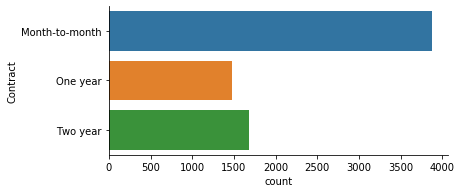

In [17]:
print("Contract:")
print(churn['Contract'].value_counts(normalize=True) * 100)

ax = sns.catplot(y="Contract", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

## Contract vs Churn

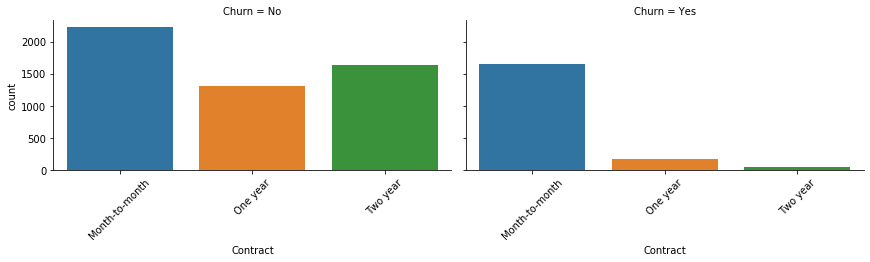

In [18]:
g = sns.catplot(x="Contract", col="Churn",
                data=churn, kind="count", height=3, aspect=2)
g.set_xticklabels(rotation=45)

### Insights
- From the first plot it shows that majority of the clients are month to month users.
- The second plot shows that the churn rate for month to month users is really high, this might be because it is easy to get out of a month to month contract if you are unhappy with the service or just trying it out or if the client has found or been offered something better.
- There are also alot of clients that have two year contracts and their churn rate is very low.

## Multiple lines count

MultipleLines:
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: MultipleLines, dtype: float64


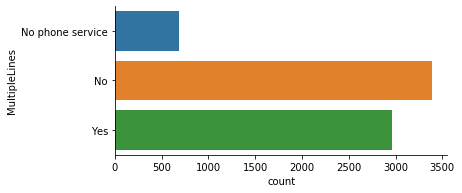

In [19]:
print("MultipleLines:")
print(churn['MultipleLines'].value_counts(normalize=True) * 100)

ax = sns.catplot(y="MultipleLines", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

## Multiple lines vs Churn

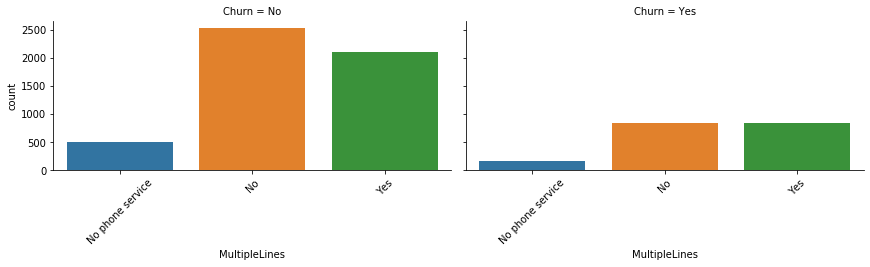

In [20]:
g = sns.catplot(x="MultipleLines", col="Churn",
                data=churn, kind="count", height=3, aspect=2)
g.set_xticklabels(rotation=45)

### Insights
- Majority of clients don't have multiple lines and the churn rate between clients with and without multiple lines is very similar. I will need to do more research into why this is

## Payment Method count

PaymentMethod:
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64


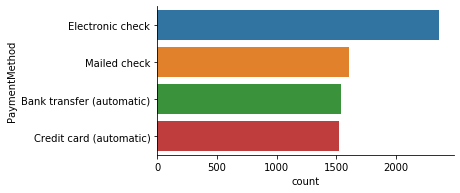

In [21]:
print("PaymentMethod:")
print(churn['PaymentMethod'].value_counts(normalize=True) * 100)

ax = sns.catplot(y="PaymentMethod", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

## Payment Method vs Churn

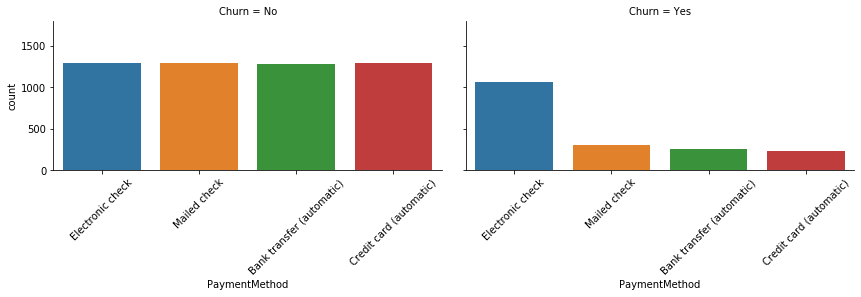

In [22]:
g = sns.catplot(x="PaymentMethod", col="Churn",
                data=churn, kind="count", height=3, aspect=2)
g.set_xticklabels(rotation=45)
g.set(ylim=(0, 1800))

### Insights
- In the first plot it is clear that most of the clients payment method is electronic check
- It is interestiing that electronic check has the highest churn rate by far. This could mean that electronic check may not be the best payment method for clients 

## Tenure vs churn count

Text(0.5, 0, 'Tenure')

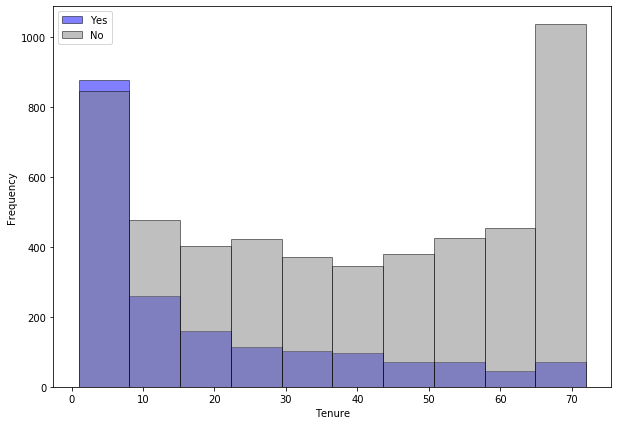

In [23]:
churn[churn['Churn']=='Yes'].tenure.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
churn[churn['Churn']=='No'].tenure.plot(kind='hist',color='grey',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Yes','No'])
plt.xlabel('Tenure')

### Insight

- From the plot above it looks like the majority of churn happens during the first 10 months of having a contract and the least amount of churn happens with tenures that are greater than 60 months.

### I am going create dummy variables with my categorical data so that I am able to derive insights from the data

In [24]:
churn = pd.get_dummies(churn, columns=['MultipleLines','InternetService','Contract',
                                       'PaymentMethod','OnlineSecurity','OnlineBackup',
                                       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [25]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,...,0,1,0,0,1,0,0,1,0,0
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,...,1,1,0,0,1,0,0,1,0,0
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,...,0,1,0,0,1,0,0,1,0,0
3,Male,0,No,No,45,No,No,42.30,1840.75,No,...,1,0,0,1,1,0,0,1,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


In [26]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
gender                                     7032 non-null object
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null object
Dependents                                 7032 non-null object
tenure                                     7032 non-null int64
PhoneService                               7032 non-null object
PaperlessBilling                           7032 non-null object
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7032 non-null object
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
I

### I will now make all the categorical data 0's and 1's so that I am able to work with them

In [27]:
def encode_labels(df):
    le = preprocessing.LabelEncoder()
    for column in df.columns:
        if df[column].dtype == type(object):
            df[column] = le.fit_transform(df[column])
    return df

churn = encode_labels(churn)

In [28]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


### I will now create a corrolation matrix to see how the features correlate

[Text(0.5, 0, 'gender'),
 Text(1.5, 0, 'SeniorCitizen'),
 Text(2.5, 0, 'Partner'),
 Text(3.5, 0, 'Dependents'),
 Text(4.5, 0, 'tenure'),
 Text(5.5, 0, 'PhoneService'),
 Text(6.5, 0, 'PaperlessBilling'),
 Text(7.5, 0, 'MonthlyCharges'),
 Text(8.5, 0, 'TotalCharges'),
 Text(9.5, 0, 'Churn'),
 Text(10.5, 0, 'MultipleLines_No'),
 Text(11.5, 0, 'MultipleLines_No phone service'),
 Text(12.5, 0, 'MultipleLines_Yes'),
 Text(13.5, 0, 'InternetService_DSL'),
 Text(14.5, 0, 'InternetService_Fiber optic'),
 Text(15.5, 0, 'InternetService_No'),
 Text(16.5, 0, 'Contract_Month-to-month'),
 Text(17.5, 0, 'Contract_One year'),
 Text(18.5, 0, 'Contract_Two year'),
 Text(19.5, 0, 'PaymentMethod_Bank transfer (automatic)'),
 Text(20.5, 0, 'PaymentMethod_Credit card (automatic)'),
 Text(21.5, 0, 'PaymentMethod_Electronic check'),
 Text(22.5, 0, 'PaymentMethod_Mailed check'),
 Text(23.5, 0, 'OnlineSecurity_No'),
 Text(24.5, 0, 'OnlineSecurity_No internet service'),
 Text(25.5, 0, 'OnlineSecurity_Yes'),
 Tex

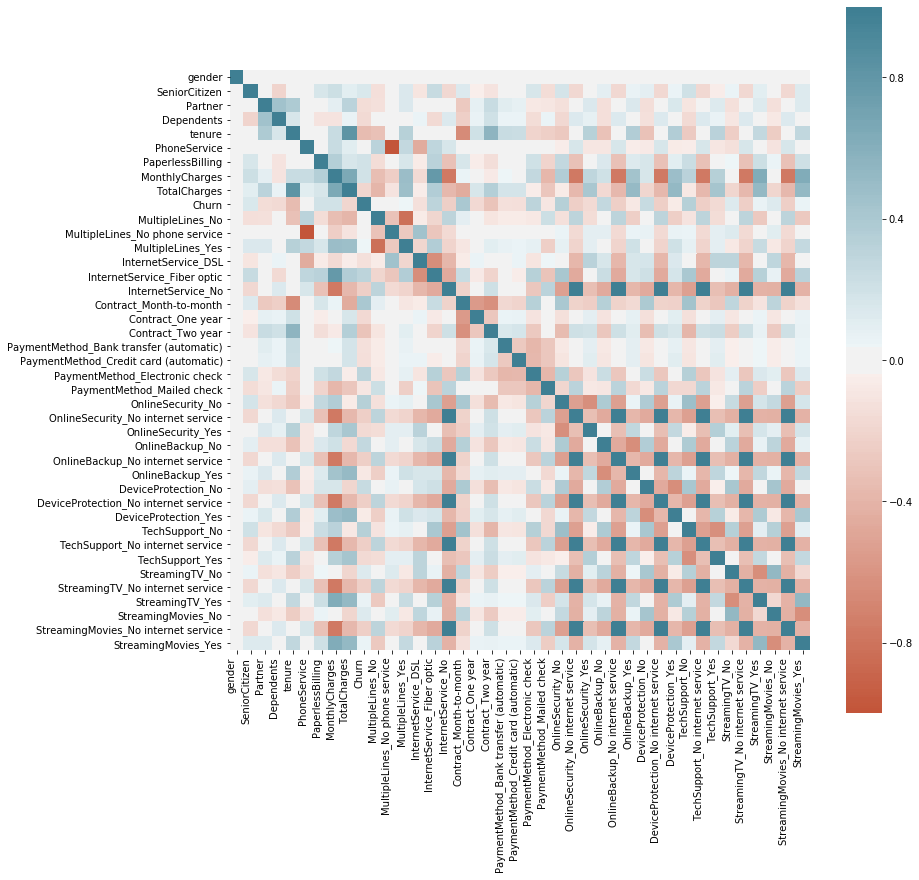

In [29]:
corr = churn.corr()

plt.figure(figsize=(13,13))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt=".2f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

### Insights
- The correlation matrix is a bit noisy because there is a lot going on, I will rather use the corrolation of all features compared with the target variable which is churn. I all looking for features that are positively correlated to use in my model. I see that tenure is correlated with a number of features, even though it is negatively correlated to churn I am going to use it in my model

In [30]:
churn.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
OnlineBackup_No internet service          -0.227578
TechSupport_No internet service           -0.227578
StreamingMovies_No internet service       -0.227578
OnlineSecurity_No internet service        -0.227578
DeviceProtection_No internet service      -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

### Insights
- From the correlation matrix there are a few variables that seem to be positively correlated with churn, these variables are: Phone Service, Multiple lines, Senior Citizen, Paperless Billing, Monthly Charges, Payment Method Electronic check, Internet Service fiber optic, Contract month to month.

- I will use these feature to train and test my model on to see how accurately I can predict churn without overfitting

### Split your data into train and test sets.

# I first trained my data on the commented out fields

- The features below that are commented out give me an accuracy of 78.5% for my decision tree. This is good but when I create a confusion matrix my false negatives are larger than my true negatives. This isn't good so I will use more features that are positively correlated to churn to try to improve my confusion matrix.

In [47]:
#feature_cols = ['PhoneService','MultipleLines_Yes','SeniorCitizen',
#                 'PaperlessBilling','MonthlyCharges','PaymentMethod_Electronic check','InternetService_Fiber optic',
#                'Contract_Month-to-month','tenure']

feature_cols = ['PhoneService','MultipleLines_Yes','StreamingMovies_Yes','StreamingTV_Yes','StreamingTV_No',
               'StreamingMovies_No','SeniorCitizen','PaperlessBilling','MonthlyCharges','DeviceProtection_No',
               'OnlineBackup_No','PaymentMethod_Electronic check','InternetService_Fiber optic','TechSupport_No',
                'OnlineSecurity_No','Contract_Month-to-month','tenure']

X = churn[feature_cols]
y = churn.Churn

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth = 3, splitter='random')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
def run_model(model,train_predictors,train_target,test_pred):
    model.fit(train_pred,test_target)
    tarrget_pred = model.predictions(test_pred)
    return target_predictions

### Report the accuracy of your model on the training set and on the test set. How successful is the model.

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7924662402274343


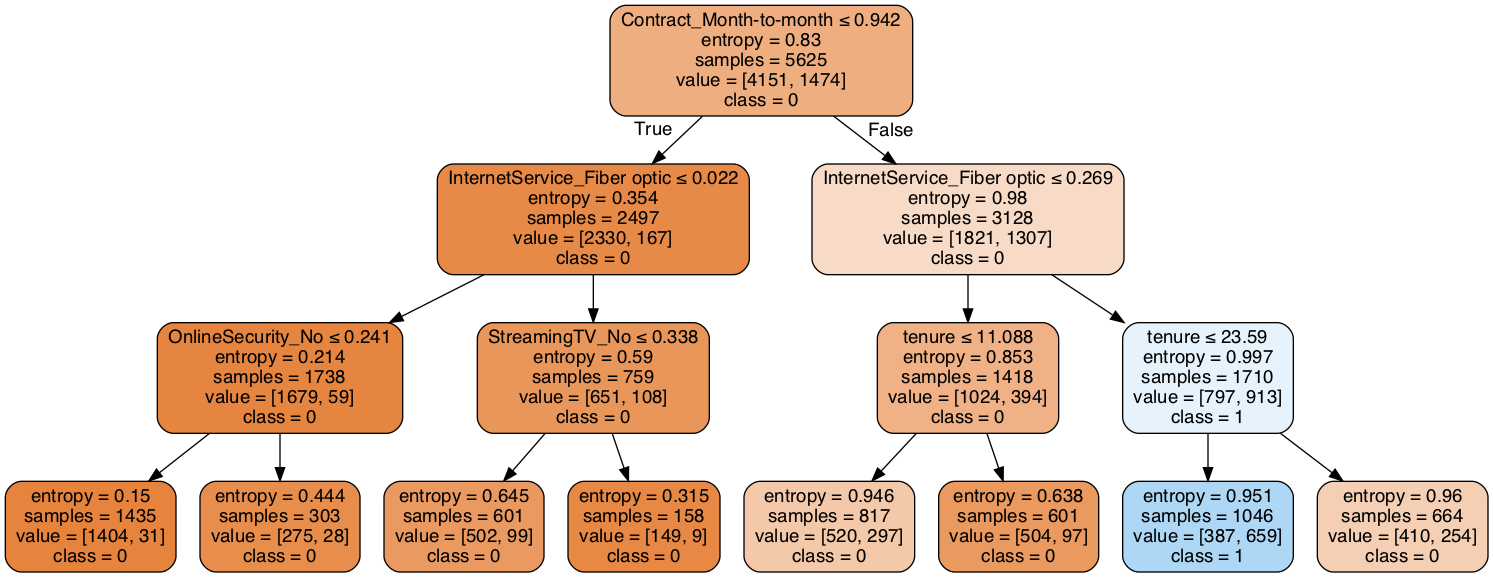

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
graph.write_pdf('churn.pdf') 
Image(graph.create_png())

### confusion matrix

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

print(c_matrix)

[[895 117]
 [174 221]]


### What is its sensitivity and specificity?

In [58]:
tp = 895
fp = 117
fn = 174
tn = 221

sensitivity = (tp/(tp+fn)) * 100
specificity = (tn/(fp + tn)) *100

print('sensitivity:')
print(int(sensitivity))

print('specificity')
print(int(specificity))

sensitivity:
83
specificity
65


### Insights
- From sensitivity I am able to see that my model was able to correctly classify no churn right 84% of the time. I am also able to see that my model classified churn right 65% of the time

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

### Create a classification report and confusion matrix of predicted and observed values. What is the accuracy, sensitivity and specificity of the model on the (a) training and (b) test data?

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7960199004975125


In [86]:
print(confusion_matrix(y_test, predictions))

[[918  94]
 [193 202]]


In [64]:
tp = 918
fp = 94
fn = 193
tn = 202

sensitivity = (tp/(tp+fn)) * 100
specificity = (tn/(fp + tn)) *100

print('sensitivity:')
print(int(sensitivity))

print('specificity')
print(int(specificity))

sensitivity:
82
specificity
68


### Plot a Receiver Operating Characteristic (ROC) curve on the test data.

AUC: 0.848


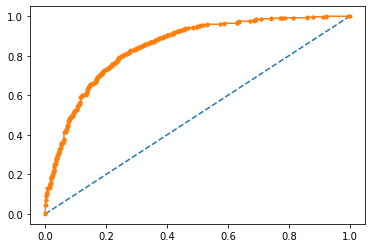

In [83]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only(churned)
probs = probs[:, 1]
# calculate AUC score of our roc curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
# The roc curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()